In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [108]:
df = pd.read_csv("/content/drive/MyDrive/Manaf马那夫/ionosphere_data.csv", encoding='latin-1', delimiter=',')
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [109]:
df.describe()

,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,...,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Three columns are non numerical data, we gonna look at them first**

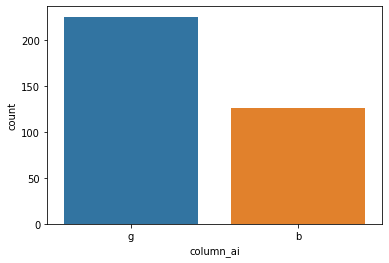

In [110]:
sns.countplot(x='values', data=df)

**Dataset is not equilibrated, this will lead the program to predict more class g than class b. So in a first place we gonna try to equilibrate it**

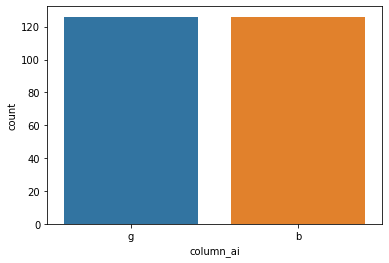

In [111]:
b = df[df.column_ai == 'b' ]
g = df[df.column_ai =='g' ]
newdata = g.sample(replace=False,n=len(b),random_state=42)
df = pd.concat([newdata, b])
sns.countplot(x='column_ai', data=df)

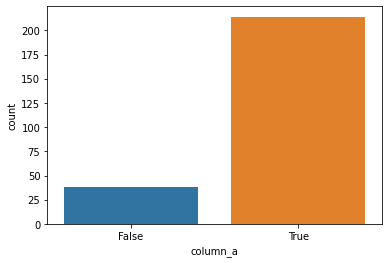

In [112]:
sns.countplot(x='column_a', data=df)

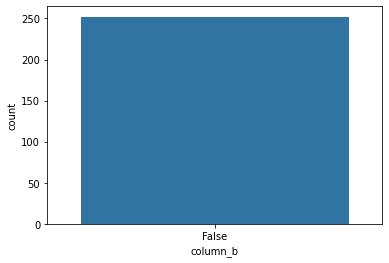

In [113]:
sns.countplot(x='column_b', data=df)

**column_b takes one value so we gonna drop this column, otherwise we gonna change column_a to a numerical binary variable to calculate later the impact of this variable on the predicted feature**

In [114]:
df.drop(columns=['column_b'], inplace=True)
encoding1 = {'g': 1, 'b': 0}
df.column_ai.replace(encoding1, inplace=True)
encoding2 = { False : 0, True : 1}
df.column_a.replace(encoding2, inplace=True)
df.head()

,column_a,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
18,1,0.67065,0.02528,0.66626,0.05031,0.57197,0.18761,0.08776,0.34081,0.63621,...,0.23724,0.46167,0.24618,0.43433,0.25306,0.40663,0.25792,1.00000,0.33036,1
310,1,0.93658,0.35107,0.75254,0.65640,0.45571,0.88576,0.15323,0.95776,-0.21775,...,-0.84951,-0.04578,-0.91221,0.27330,-0.85762,0.54827,-0.69613,0.74828,-0.44173,1
239,1,0.61857,0.10850,0.70694,-0.06935,0.70358,0.01678,0.74273,0.00224,0.71029,...,-0.09508,0.69845,-0.01673,0.63311,0.04810,0.78859,-0.05145,0.65213,-0.04698,1
333,1,0.97513,0.00710,0.98579,0.01954,1.00000,0.01954,0.99290,0.01599,0.95737,...,0.03552,0.97540,0.06477,0.94849,0.08171,0.99112,0.06217,0.98934,0.09947,1
274,1,0.71521,-0.00647,0.66667,-0.04207,0.63107,-0.05178,0.77994,0.08091,0.67314,...,-0.05502,0.45105,0.00040,0.31392,-0.06796,0.49191,-0.10680,0.30421,-0.05178,1


In [115]:
ColAeCorr = df.corr().column_ai

In [116]:
ColAeCorr = abs(ColAeCorr)
ColAeCorr.sort_values()

column_ad    0.005204
column_x     0.015660
column_z     0.026256
column_af    0.026297
column_t     0.049154
column_ah    0.050646
column_ab    0.057279
column_q     0.064948
column_v     0.094549
column_s     0.101998
column_d     0.113806
column_j     0.129582
column_aa    0.140679
column_r     0.140704
column_f     0.153061
column_k     0.156981
column_p     0.157220
column_y     0.157316
column_m     0.169680
column_l     0.179122
column_w     0.187215
column_o     0.202181
column_u     0.204926
column_n     0.205041
column_ac    0.209956
column_h     0.214268
column_ag    0.225875
column_ae    0.259594
column_i     0.288317
column_a     0.421391
column_g     0.422509
column_c     0.485443
column_e     0.490696
column_ai    1.000000
Name: column_ai, dtype: float64

**We gonna take 0.4 as a threshold**

In [117]:
X = df[['column_e','column_c','column_g','column_a']].values
Y = df['column_ai'].values

**Train set and validation preparation**

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [119]:
Y_train

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0])

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [121]:
Y_pred_train = logreg.predict_proba(X_train)

THRESHOLD = 0.5
tt = pd.crosstab(Y_train, Y_pred_train[:,1] > THRESHOLD)
tt

col_0,False,True
row_0,,
0,80,24
1,8,89


In [122]:
t = np.linspace(0.1,0.9, 1000)
acc = []
for i in t :
  THRESHOLD = i
  Y_pred_train = logreg.predict_proba(X_train)
  crossTab = pd.crosstab(Y_train, Y_pred_train[:,1] > THRESHOLD)
  try :
    acc.append((crossTab[0][0] + crossTab[1][1]) / 201)
  except:
    acc.append(0)

In [123]:
max_val = np.max(acc)
idx = acc.index(max_val)
best_THRESHOLD = t[idx]
print(idx)
print(best_THRESHOLD)

404
0.4235235235235235


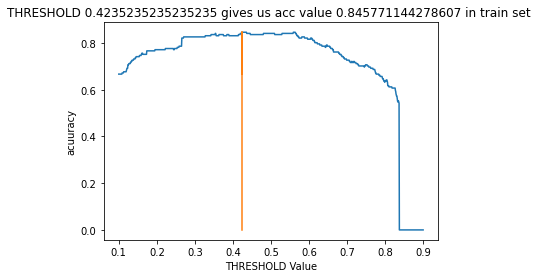

In [124]:
bt = np.linspace(best_THRESHOLD , best_THRESHOLD, 1000)
plt.plot(t, acc)
plt.plot(bt, acc)
plt.ylabel('acuuracy')
plt.xlabel('THRESHOLD Value')
plt.title('THRESHOLD %s gives us acc value %s in train set ' % (best_THRESHOLD,max_val) )
plt.show()

In [125]:
Y_pred_test = logreg.predict_proba(X_test)

tt = pd.crosstab(Y_test, Y_pred_test[:,1] > best_THRESHOLD)
tt

col_0,False,True
row_0,,
0,18,4
1,2,27


In [126]:
accuracy = (tt[0][0] + tt[1][1]) / 51

print('Accuracy on test set %s' %accuracy)


Accuracy on test set 0.8823529411764706
